In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

originalMilestone = pd.read_excel('Milestone Sheet 2019 complete v01_edited.xlsx')

In [2]:
originalMilestone [['AODB| DEP Flight Type']] 
flightType = pd.DataFrame({'flightType': originalMilestone ['AODB| DEP Flight Type'] })

print(pd.get_dummies(flightType))

       flightType_C  flightType_J  flightType_K  flightType_P
0                 0             1             0             0
1                 0             1             0             0
2                 0             1             0             0
3                 0             1             0             0
4                 0             1             0             0
...             ...           ...           ...           ...
27306             0             1             0             0
27307             0             1             0             0
27308             0             1             0             0
27309             0             1             0             0
27310             0             1             0             0

[27311 rows x 4 columns]


In [3]:
#data preprocessing
origiTimeMilestone = originalMilestone[['GMAN Airline','GMAN Aircraft Type','Schedule Turn','Arrival Delay','AODB| DEP Flight Type','TOBT Accuracy',
                                        'Accuracy within +/-5min','First Pax Off','Last Pax Off','First Bag Off',
                                        'Last Bag Off','Catering Start','Catering Stop','Cleaning Start',
                                        'Cleaning Stop','Fuelling Start','Fuelling Stop','First Bag On',
                                        'Last Bag On','First Pax On','Last Pax On','AOBT']]

timeMilestone = origiTimeMilestone.fillna(0)

timeMilestone = timeMilestone.drop(timeMilestone[(timeMilestone['AOBT']<=20.0)|(timeMilestone['AOBT']>60.0)].index)
timeMilestone



GMAN Airline GMAN Aircraft Type  Schedule Turn  Arrival Delay  \
1              BAW               E190             35           -9.0   
2              LGL               DH8D             30           -4.0   
3              KLM               E190             30           -9.0   
4              DLH               E190             35           -4.0   
5              BAW               E170             35            7.0   
...            ...                ...            ...            ...   
27306          SWR               BCS1             35          -15.0   
27307          KLM               E190             30          -19.0   
27308          EIN               RJ85             30          -22.0   
27309          KLM               E190             30          -17.0   
27310          KLM               E190             30           -7.0   

      AODB| DEP Flight Type  TOBT Accuracy  Accuracy within +/-5min  \
1                         J       1.000000                      1.0   
2                         J       6.433333                      0.0   
3                         J      -2.666667                      1.0   
4                         J      -0.616667                      1.0   
5                         J      -3.000000                      1.0   
...                     ...            ...                      ...   
27306                     J      12.183333                      0.0   
27307                     J      18.000000                      0.0   
27308                     J      31.733333                      0.0   
27309                     J      22.000000                      0.0   
27310                     J      16.000000                      0.0   

       First Pax Off  Last Pax Off  First Bag Off  ...  Catering Stop  \
1               14.0          15.0           11.0  ...           21.0   
2               12.0          13.0           11.0  ...            0.0   
3                7.0          11.0            7.0  ...            0.0   
4                3.0           7.0            6.0  ...            0.0   
5                5.0           8.0            0.0  ...           15.0   
...              ...           ...            ...  ...            ...   
27306            4.0           9.0            0.0  ...            0.0   
27307            6.0           9.0            5.0  ...            0.0   
27308            2.0           9.0            0.0  ...            0.0   
27309            3.0          10.0            0.0  ...            0.0   
27310            4.0           6.0            5.0  ...            0.0   

       Cleaning Start  Cleaning Stop  Fuelling Start  Fuelling Stop  \
1                15.0           21.0            15.0           21.0   
2                14.0           16.0             0.0            0.0   
3                 0.0           16.0             0.0            0.0   
4                 0.0            0.0             0.0            0.0   
5                 8.0           14.0             0.0            0.0   
...               ...            ...             ...            ...   
27306            11.0           20.0            11.0           18.0   
27307             0.0           19.0             0.0            0.0   
27308             0.0            0.0             0.0            0.0   
27309             0.0            0.0             0.0            9.0   
27310             0.0           10.0             0.0            0.0   

       First Bag On  Last Bag On  First Pax On  Last Pax On  AOBT  
1              14.0         27.0          24.0         34.0  43.0  
2              15.0         28.0          19.0         27.0  36.0  
3               0.0         24.0          22.0         38.0  43.0  
4              12.0          0.0          19.0          0.0  41.0  
5               0.0         22.0          19.0         22.0  34.0  
...             ...          ...           ...          ...   ...  
27306          15.0         17.0          20.0         30.0  41.0  
27307          19.0       

In [4]:
#data preprocessing
subProcessDurDic ={'Deplaning': timeMilestone['Last Pax Off']-timeMilestone['First Pax Off'],
               'Unloading': timeMilestone['Last Bag Off']-timeMilestone['First Bag Off'],
               'Catering': timeMilestone['Catering Stop']-timeMilestone['Catering Start'],
               'Cleaning': timeMilestone['Cleaning Stop']-timeMilestone['Cleaning Start'],
               'Fuelling': timeMilestone['Fuelling Stop']-timeMilestone['Fuelling Start'],
               'Loading': timeMilestone['Last Bag On']-timeMilestone['First Bag On'],
               'Boarding': timeMilestone['Last Pax On']-timeMilestone['First Pax On'],
               'AOBT': timeMilestone['AOBT']}
subProcessDur = pd.DataFrame(subProcessDurDic)

subProcessDur[subProcessDur<0] = 0

# subProcessDur = subProcessDur.drop(subProcessDur[(subProcessDur['Deplaning']==0)|(subProcessDur['Unloading']==0)
#                                                 |(subProcessDur['Catering']==0)|(subProcessDur['Cleaning']==0)
#                                                 |(subProcessDur['Fuelling']==0)|(subProcessDur['Loading']==0)
#                                                 |(subProcessDur['Boarding']==0)].index)

#cal subprocess mean (or median) # also or mode, e.g., DeplaningMode=subProcessDur['Deplaning'][subProcessDur['Deplaning']!=0].mode()[0]

DeplaningMean=subProcessDur['Deplaning'][subProcessDur['Deplaning']!=0].mean()
UnloadingMean=subProcessDur['Unloading'][subProcessDur['Unloading']!=0].mean()
CateringMean=subProcessDur['Catering'][subProcessDur['Catering']!=0].mean()
CleaningMean=subProcessDur['Cleaning'][subProcessDur['Cleaning']!=0].mean()
FuellingMean=subProcessDur['Fuelling'][subProcessDur['Fuelling']!=0].mean()
LoadingMean=subProcessDur['Loading'][subProcessDur['Loading']!=0].mean()
BoardingMean=subProcessDur['Boarding'][subProcessDur['Boarding']!=0].mean()


#replace the 0 with mean value, because raw data has too much loss recording
subProcessDur = subProcessDur.replace({'Deplaning':{0.0:DeplaningMean}})
subProcessDur = subProcessDur.replace({'Unloading':{0.0:UnloadingMean}})
subProcessDur = subProcessDur.replace({'Catering':{0.0:CateringMean}})
subProcessDur = subProcessDur.replace({'Cleaning':{0.0:CleaningMean}})
subProcessDur = subProcessDur.replace({'Fuelling':{0.0:FuellingMean}})
subProcessDur = subProcessDur.replace({'Loading':{0.0:LoadingMean}})
subProcessDur = subProcessDur.replace({'Boarding':{0.0:BoardingMean}})

# #cal subprocess median (or mean)
# DeplaningMedian=subProcessDur['Deplaning'][subProcessDur['Deplaning']!=0].median()
# UnloadingMedian=subProcessDur['Unloading'][subProcessDur['Unloading']!=0].median()
# CateringMedian=subProcessDur['Catering'][subProcessDur['Catering']!=0].median()
# CleaningMedian=subProcessDur['Cleaning'][subProcessDur['Cleaning']!=0].median()
# FuellingMedian=subProcessDur['Fuelling'][subProcessDur['Fuelling']!=0].median()
# LoadingMedian=subProcessDur['Loading'][subProcessDur['Loading']!=0].median()
# BoardingMedian=subProcessDur['Boarding'][subProcessDur['Boarding']!=0].median()


# #replace the 0 with mean value, because raw data has too much loss recording
# subProcessDur = subProcessDur.replace({'Deplaning':{0.0:DeplaningMedian}})
# subProcessDur = subProcessDur.replace({'Unloading':{0.0:UnloadingMedian}})
# subProcessDur = subProcessDur.replace({'Catering':{0.0:CateringMedian}})
# subProcessDur = subProcessDur.replace({'Cleaning':{0.0:CleaningMedian}})
# subProcessDur = subProcessDur.replace({'Fuelling':{0.0:FuellingMedian}})
# subProcessDur = subProcessDur.replace({'Loading':{0.0:LoadingMedian}})
# subProcessDur = subProcessDur.replace({'Boarding':{0.0:BoardingMedian}})


AOBT = subProcessDur[['AOBT']]

subProcessDur = subProcessDur.drop(['AOBT'],axis =1)





In [5]:
import category_encoders as ce

encoder1 = ce.target_encoder.TargetEncoder()
encoder1.fit(timeMilestone['GMAN Airline'], timeMilestone['AOBT'])
timeMilestone['Airline'] = encoder1.transform(timeMilestone['GMAN Airline'])

encoder2 = ce.target_encoder.TargetEncoder()
encoder2.fit(timeMilestone['GMAN Aircraft Type'], timeMilestone['AOBT'])
timeMilestone['Aircraft Type'] = encoder2.transform(timeMilestone['GMAN Aircraft Type'])

timeMilestone

C:\Users\mluo\AppData\Roaming\Python\Python38\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\mluo\AppData\Roaming\Python\Python38\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GMAN Airline GMAN Aircraft Type  Schedule Turn  Arrival Delay  \
1              BAW               E190             35           -9.0   
2              LGL               DH8D             30           -4.0   
3              KLM               E190             30           -9.0   
4              DLH               E190             35           -4.0   
5              BAW               E170             35            7.0   
...            ...                ...            ...            ...   
27306          SWR               BCS1             35          -15.0   
27307          KLM               E190             30          -19.0   
27308          EIN               RJ85             30          -22.0   
27309          KLM               E190             30          -17.0   
27310          KLM               E190             30           -7.0   

      AODB| DEP Flight Type  TOBT Accuracy  Accuracy within +/-5min  \
1                         J       1.000000                      1.0   
2                         J       6.433333                      0.0   
3                         J      -2.666667                      1.0   
4                         J      -0.616667                      1.0   
5                         J      -3.000000                      1.0   
...                     ...            ...                      ...   
27306                     J      12.183333                      0.0   
27307                     J      18.000000                      0.0   
27308                     J      31.733333                      0.0   
27309                     J      22.000000                      0.0   
27310                     J      16.000000                      0.0   

       First Pax Off  Last Pax Off  First Bag Off  ...  Cleaning Stop  \
1               14.0          15.0           11.0  ...           21.0   
2               12.0          13.0           11.0  ...           16.0   
3                7.0          11.0            7.0  ...           16.0   
4                3.0           7.0            6.0  ...            0.0   
5                5.0           8.0            0.0  ...           14.0   
...              ...           ...            ...  ...            ...   
27306            4.0           9.0            0.0  ...           20.0   
27307            6.0           9.0            5.0  ...           19.0   
27308            2.0           9.0            0.0  ...            0.0   
27309            3.0          10.0            0.0  ...            0.0   
27310            4.0           6.0            5.0  ...           10.0   

       Fuelling Start  Fuelling Stop  First Bag On  Last Bag On  First Pax On  \
1                15.0           21.0          14.0         27.0          24.0   
2                 0.0            0.0          15.0         28.0          19.0   
3                 0.0            0.0           0.0         24.0          22.0   
4                 0.0            0.0          12.0          0.0          19.0   
5                 0.0            0.0           0.0         22.0          19.0   
...               ...            ...           ...          ...           ...   
27306            11.0           18.0          15.0         17.0          20.0   
27307             0.0            0.0          19.0         21.0          28.0   
27308             0.0            0.0           6.0          6.0          15.0   
27309             0.0            9.0          12.0         12.0          12.0   
27310             0.0            0.0          10.0         10.0          10.0   

       Last Pax On  AOBT    Airline  Aircraft Type  
1             34.0  43.0  43.017830      43.305527  
2             27.0  36.0  37.373723      41.095694  
3             38.0  43.0  41.703537      43.305527  
4              0.0  41.0  43.128326      43.305527  
5             22.0  34.0  43.017830      42.341748  
...            ...   ...        ...            ...  
27306         30.0  41.0  45.361846      46.345266  
27307         29.0  34.0  

In [6]:
# flightType = pd.DataFrame({'flightType': timeMilestone ['AODB| DEP Flight Type'] })
# dummyFlightType = pd.get_dummies(flightType)

In [7]:
inputDF = pd.concat([timeMilestone[['Airline']], timeMilestone[['Aircraft Type']],timeMilestone[['Schedule Turn']],
                     timeMilestone[['Arrival Delay']], subProcessDur],axis =1) # timeMilestone[['TOBT Accuracy']]

inputDF

Airline  Aircraft Type  Schedule Turn  Arrival Delay  Deplaning  \
1      43.017830      43.305527             35           -9.0        1.0   
2      37.373723      41.095694             30           -4.0        1.0   
3      41.703537      43.305527             30           -9.0        4.0   
4      43.128326      43.305527             35           -4.0        4.0   
5      43.017830      42.341748             35            7.0        3.0   
...          ...            ...            ...            ...        ...   
27306  45.361846      46.345266             35          -15.0        5.0   
27307  41.703537      43.305527             30          -19.0        3.0   
27308  41.757713      41.780761             30          -22.0        7.0   
27309  41.703537      43.305527             30          -17.0        7.0   
27310  41.703537      43.305527             30           -7.0        2.0   

       Unloading  Catering   Cleaning  Fuelling    Loading   Boarding  
1       4.000000  6.000000   6.000000   6.00000  13.000000  10.000000  
2       3.000000  9.657189   2.000000  11.32186  13.000000   8.000000  
3       8.000000  9.657189  16.000000  11.32186  24.000000  16.000000  
4       6.000000  9.657189  10.669502  11.32186   8.556739   8.858905  
5       5.718102  7.000000   6.000000  11.32186  22.000000   3.000000  
...          ...       ...        ...       ...        ...        ...  
27306   5.718102  9.657189   9.000000   7.00000   2.000000  10.000000  
27307   4.000000  9.657189  19.000000  11.32186   2.000000   1.000000  
27308   5.718102  9.657189  10.669502  11.32186   8.556739   2.000000  
27309   5.718102  9.657189  10.669502   9.00000   8.556739   2.000000  
27310   4.000000  9.657189  10.000000  11.32186   8.556739   8.858905  

[22755 rows x 11 columns]

In [8]:
AOBT

AOBT
1      43.0
2      36.0
3      43.0
4      41.0
5      34.0
...     ...
27306  41.0
27307  34.0
27308  23.0
27309  27.0
27310  24.0

[22755 rows x 1 columns]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import TweedieRegressor

randomState = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(inputDF, AOBT.values.ravel(), test_size=0.1, random_state=randomState)

# standardization
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# X_train.values
# y_train.values.ravel()
# print(X_test.values)
# print(y_test.values.ravel())

# generalized linear regression
m_glr = TweedieRegressor(power=0, max_iter = 100000)
m_glr.fit(X_train_std, y_train)
m_glr.score(X_test_std, y_test)

y_pred = m_glr.predict(X_test_std)

print('R2 of glr: %f' %r2_score(y_test, y_pred))
print('MSE of glr: %f' %mean_squared_error(y_test, y_pred))



R2 of glr: 0.230895
MSE of glr: 44.846910


In [10]:
from sklearn import tree

# decision trees
m_dt = tree.DecisionTreeRegressor(max_depth=3)
m_dt.fit(X_train_std, y_train)
m_dt.score(X_test_std, y_test)

y_pred = m_dt.predict(X_test_std)

print('R2 of dt: %f' %r2_score(y_test, y_pred))
print('MSE of dt: %f' %mean_squared_error(y_test, y_pred))
print(m_dt.feature_importances_)

R2 of dt: 0.198991
MSE of dt: 46.707288
[0.01547719 0.         0.06298856 0.56096327 0.         0.
 0.         0.         0.         0.24097684 0.11959414]


In [11]:
from sklearn.ensemble import RandomForestRegressor

# random forest
m_rf = RandomForestRegressor()
m_rf.fit(X_train_std, y_train)
m_rf.score(X_test_std, y_test)

y_pred = m_rf.predict(X_test_std)

print('R2 of rf: %f' %r2_score(y_test, y_pred))
print('MSE of rf: %f' %mean_squared_error(y_test, y_pred))
print(m_rf.feature_importances_)

R2 of rf: 0.382553
MSE of rf: 36.003651
[0.04244672 0.04305195 0.07766933 0.27381484 0.06779674 0.04797444
 0.03739852 0.07128219 0.08172478 0.14642821 0.11041227]


In [12]:
# from sklearn.ensemble import GradientBoostingRegressor

# # gradient tree boosting
# m_gtb = GradientBoostingRegressor(n_estimators=1000)
# m_gtb.fit(X_train_std, y_train)
# m_gtb.score(X_test_std, y_test)

# y_pred = m_gtb.predict(X_test_std)

# print('R2 of gtb: %f' %r2_score(y_test, y_pred))
# print('MSE of gtb: %f' %mean_squared_error(y_test, y_pred))

In [13]:
import xgboost as xgb

# XGBoost
m_xgb = xgb.XGBRegressor(booster = 'gbtree')
m_xgb.fit(X_train_std, y_train)
m_xgb.score(X_test_std, y_test)

y_pred = m_xgb.predict(X_test_std)

print('R2 of xgb: %f' %r2_score(y_test, y_pred))
print('MSE of xgb: %f' %mean_squared_error(y_test, y_pred))
print(m_xgb.feature_importances_)

R2 of xgb: 0.403912
MSE of xgb: 34.758219
[0.07215659 0.08066066 0.15702376 0.16460475 0.05448567 0.03611717
 0.03239818 0.0524394  0.05716775 0.16999657 0.12294955]


In [14]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Input, Dense, Activation,Dropout
# from tensorflow.keras.models import Model

# # m_nn = keras.Sequential()
# # m_nn.add(keras.layers.Dense(X_train.values.shape[1], activation=tf.nn.selu))
# input_layer = Input(shape=(X_train_std.shape[1],))
# dense_layer_1 = Dense(10*X_train.shape[1], activation='relu')(input_layer)
# dense_layer_2 = Dense(5*X_train.shape[1], activation='relu')(dense_layer_1)
# dense_layer_3 = Dense(2*X_train.shape[1], activation='relu')(dense_layer_2)
# output = Dense(1)(dense_layer_3)

# m_nn = Model(inputs=input_layer, outputs=output)
# m_nn.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
# history = m_nn.fit(X_train_std, y_train, batch_size=2, epochs=10, verbose=1, validation_split=0.2)

# y_pred = m_nn.predict(X_test_std)

# print('R2 of nn: %f' %r2_score(y_test, y_pred))
# print('MSE of nn: %f' %mean_squared_error(y_test, y_pred))

In [15]:
import shap

# 导入package， 就可以用shape获得一个解释器
explainer_xgb = shap.TreeExplainer(m_xgb)

# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer_xgb.shap_values(X_train_std)
# shape_values.shape    

# print(shap_values)

# 获得基线ybase
ybase_xgb = explainer_xgb.expected_value
print(ybase_xgb)   

## 基线值等于训练集的目标变量的拟合值的均值
pred_xgb = m_xgb.predict(X_train_std)
#print(pred_xgb.mean())  

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


42.660435


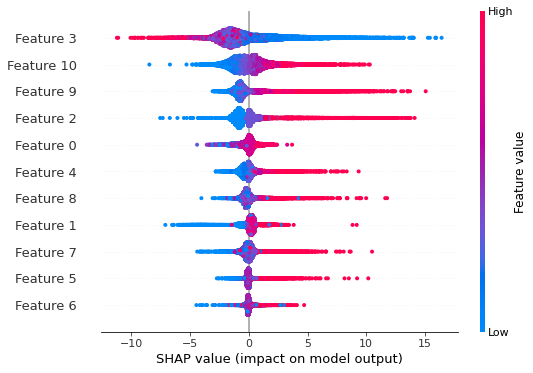

In [16]:
shap.summary_plot(shap_values, X_train_std) #class_names=model.classes_

In [17]:
import math
math.sqrt(46.707288)

6.834273041077595

In [18]:
math.sqrt(36.003651)

6.0003042422863855

In [19]:
math.sqrt(34.758219)

5.895610146541238